In [16]:
import polars as pl
import altair as alt
import matplotlib.pyplot as plt

In [104]:
data = pl.read_csv("./datasets/results/pop_compare.csv")
data

COUNTRY,CITY,DISTRICT,TYPE,Dataset Estimate,Official Estimate
str,str,str,str,f64,f64
"""Vietnam""","""Hà Nội""","""Đống Đa""","""Quận""",478.032,401.7
"""Vietnam""","""Hà Nội""","""Đông Anh""","""Huyện""",427.819,374.9
"""Vietnam""","""Hà Nội""","""Hoàng Mai""","""Quận""",424.121,364.9
"""Vietnam""","""Hà Nội""","""Hai Bà Trưng""","""Quận""",369.003,315.9
"""Vietnam""","""Hà Nội""","""Chương Mỹ""","""Huyện""",364.014,309.6
…,…,…,…,…,…
"""Vietnam""","""Hà Nội""","""Thanh Oai""","""Huyện""",196.813,185.4
"""Vietnam""","""Hà Nội""","""Hoàn Kiếm""","""Quận""",182.718,155.9
"""Vietnam""","""Hà Nội""","""Đan Phượng""","""Huyện""",181.365,154.3


In [81]:
data.pivot("DISTRICT", index=)

TypeError: DataFrame.pivot() missing 1 required positional argument: 'on'

In [73]:
origin = pl.read_excel("./datasets/results/poi_original.xlsx")
origin["Population"]

Population
f64
34169.45378
28474.71841
28156.14022
29797.09709
33999.23791
…
1984.815396
1141.803103
2115.247544


In [30]:
data = data.with_columns(((pl.col("Official Estimate") - pl.col("Dataset Estimate"))*100/pl.col("Official Estimate")).alias("percent off"))

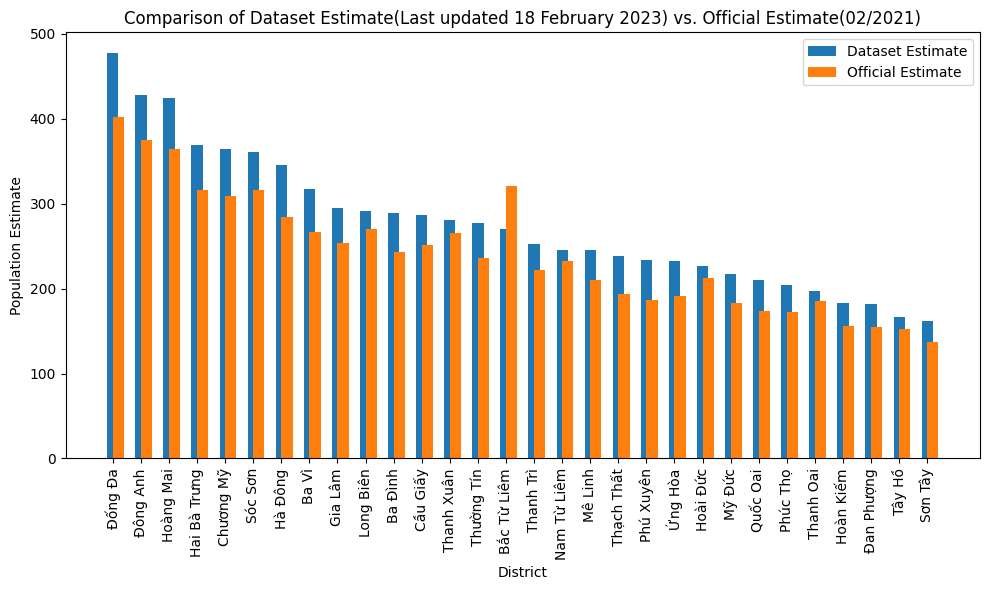

In [71]:
# Create a bar chart comparing Dataset Estimate and Official Estimate
plt.figure(figsize=(10, 6))
cities = data['DISTRICT']

# Plotting the estimates
plt.bar(cities, data['Dataset Estimate'], width=0.4, label='Dataset Estimate', align='center')
plt.bar(cities, data['Official Estimate'], width=0.4, label='Official Estimate', align='edge')

# Adding labels and title
plt.xlabel('District')
plt.ylabel('Population Estimate')
plt.title('Comparison of Dataset Estimate(Last updated 18 February 2023) vs. Official Estimate(02/2021)')
plt.xticks(rotation=90)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [35]:
data.select(pl.col("percent off")).mean()

percent off
f64
-14.687212


In [39]:
full = pl.read_excel("./datasets/temp/around_poi_with_population.xlsx")
full

link,title,category,latitude,longitude,address,poi_id,lat,lon,distance,population
str,str,str,f64,f64,str,i64,str,str,f64,f64
"""https://www.google.com/maps/pl…","""MAAZI Old Quarter""","""Indian restaurant""",21.03132,105.847256,"""57 P. Đường Thành, Hàng Bông, …",207,"""21.0197031""","""105.8459557""",1.293276,334328.932298
"""https://www.google.com/maps/pl…","""Trung Vuong Secondary School""","""Middle school""",21.023348,105.852186,"""26 P. Hàng Bài, Hàng Bài, Hoàn…",207,"""21.0197031""","""105.8459557""",0.76311,334328.932298
"""https://www.google.com/maps/pl…","""Rajbhog Hanoi Indian Restauran…","""Indian restaurant""",21.035277,105.849013,"""47 P. Lãn Ông, st, Hoàn Kiếm, …",207,"""21.0197031""","""105.8459557""",1.753345,334328.932298
"""https://www.google.com/maps/pl…","""Slo.Villa Restaurant""","""Restaurant""",21.022053,105.855514,"""16 P. Lý Thường Kiệt, Phan Chu…",207,"""21.0197031""","""105.8459557""",1.027139,334328.932298
"""https://www.google.com/maps/pl…","""Van Chuong Primary School""","""Primary school""",21.020428,105.837971,"""323 Ng. Văn Chương, Văn Chương…",207,"""21.0197031""","""105.8459557""",0.833933,334328.932298
…,…,…,…,…,…,…,…,…,…,…
"""https://www.google.com/maps/pl…","""Singapore International School…","""International school""",21.031515,105.816681,"""46 P. Vạn Bảo, Khu Ngoại giao …",9902,"""21.0378453""","""105.8149742""",0.722981,215093.4568
"""https://www.google.com/maps/pl…","""Kai Sushibar Restaurant""","""Restaurant""",21.032983,105.806817,"""63 Đào Tấn ha noi Hanoi City, …",9902,"""21.0378453""","""105.8149742""",1.00437,215093.4568
"""https://www.google.com/maps/pl…","""Nguyen Trai Middle School""","""Middle school""",21.030915,105.826866,"""25 P. Giang Văn Minh, Kim Mã, …",9902,"""21.0378453""","""105.8149742""",1.454899,215093.4568


In [80]:
import folium

m = folium.Map(location=(21.022672, 105.831461), zoom_start=14)

poi_id = 105
poi = full.filter(pl.col("poi_id").eq(poi_id)).to_dicts()

folium.Marker(
        location=[float(poi[0]["lat"]), float(poi[0]["lon"])],
        tooltip="Click me!",
        popup="",
        icon=folium.Icon(color="green"),
    ).add_to(m)

for place in poi:
    folium.Marker(
        location=[float(place["latitude"]), float(place["longitude"])],
        tooltip=place["title"],
        icon=folium.Icon(color="red"),
    ).add_to(m)
m

In [76]:
origin

Unique Identifier,Name,Branch/TO,Address Line 1,Country,Population,Count Commercial POIs,Count Residential POIs,Count Traffic POIs,Count Competitors,Attractiveness Score,Population_1,Count Commercial POIs_1,Count Residential POIs_1,Count Traffic POIs_1,Count Competitors_1,Score
i64,str,str,str,str,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64
100,"""1_Tr? s? CN""","""Branch""","""No. 11 Lang Ha Street, Thanh T…","""Vietnam""",34169.45378,21499,949,2626,205,4.61,0.918644,0.9,0.90339,0.913559,0.984746,4.620339
101,"""1_PGD Nam Cao""","""TO""","""TMDV 101-B6 Nam Cao Street, Gi…","""Vietnam""",28474.71841,20832,830,2460,180,4.48,0.879661,0.898305,0.872881,0.89661,0.949153,4.49661
102,"""1_PGD Tr?n Phú""","""TO""","""No. 34B Tran Phu Street, Dien …","""Vietnam""",28156.14022,25399,831,2850,185,4.59,0.876271,0.950847,0.874576,0.938983,0.961017,4.601695
103,"""1_PGD Lê Tr?ng T?n""","""TO""","""Artemis Building, No. 3 Le Tro…","""Vietnam""",29797.09709,19819,880,2202,169,4.45,0.888136,0.881356,0.884746,0.879661,0.933898,4.467797
104,"""1_PGD Yên Lãng""","""TO""","""1st Floor, 2nd Floor Building …","""Vietnam""",33999.23791,22418,1012,2640,208,4.65,0.916949,0.916949,0.920339,0.915254,0.986441,4.655932
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
11800,"""118_Tr? s? CN""","""Branch""","""No. 810 Cu Chinh Lan Street, P…","""Vietnam""",1984.815396,81,11,57,10,1.75,0.344068,0.328814,0.337288,0.394915,0.450847,1.855932
11900,"""119_Tr? s? CN""","""Branch""","""74 Huynh Huu Tuyen Street, Gia…","""Vietnam""",1141.803103,29,2,2,6,0.77,0.145763,0.232203,0.130508,0.038983,0.359322,0.90678
12000,"""120_Tr? s? CN""","""Branch""","""Dien Bien Street, Unit 8, Minh…","""Vietnam""",2115.247544,1738,63,373,9,2.39,0.367797,0.60339,0.472881,0.605085,0.428814,2.477966


In [79]:
full.join(origin, left_on='poi_id', right_on='Unique Identifier')["poi_id", "population", "Population"]

poi_id,population,Population
i64,f64,f64
207,334328.932298,33867.12934
207,334328.932298,33867.12934
207,334328.932298,33867.12934
207,334328.932298,33867.12934
207,334328.932298,33867.12934
…,…,…
9902,215093.4568,21635.43341
9902,215093.4568,21635.43341
9902,215093.4568,21635.43341


In [103]:
data

In [116]:
dataset_chart = alt.Chart(data).mark_bar().encode(
    x='DISTRICT:N',
    y='Dataset Estimate:Q'
)
official_chart = alt.Chart(data).mark_tick(color='red').encode(
    x='DISTRICT:N',
    y='Official Estimate:Q',
)
dataset_chart | official_chart

alt.HConcatChart(...)